In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  #explaination
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco_data=pd.read_csv("C:\\Users\\tarun\\OneDrive\\Data Analysis\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.shape

(7043, 21)

In [5]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
telco_data.describe()            #give result of numeric columns only

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 - SeniorCitizen is categorical values hence 25% ,50%,75% Distribution is not proper.
 - 75% customers have tenure less than 55 months.
 - Average monthly charges are USD 64.76 whereas 25% customers pays more than USD 89.85 per month.

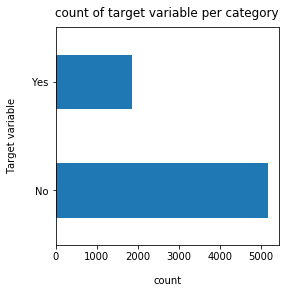

In [8]:
telco_data["Churn"].value_counts().plot(kind='barh',figsize=(4,4))   #not necessory step
plt.xlabel("count", labelpad=14)
plt.ylabel("Target variable", labelpad=14)
plt.title("count of target variable per category",y=1.02);         #did not understand

- this is churner ,non churner ratio

In [9]:
100*telco_data["Churn"].value_counts()/len(telco_data["Churn"])                 #percentage ratio

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features (other than this churner non churner ratio feature)  while taking the target values separately to get some insights.

In [10]:
len(telco_data["Churn"])                

7043

In [11]:
telco_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- value_counts returns an object containing counts of unique values in a pandas dataframe in sorted order

In [12]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode

telco_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- verbose parameter :- bool, optional
  Whether to print the full summary. By default, the setting in pandas.options.display.max_info_columns is followed.

# Visualizing missing values

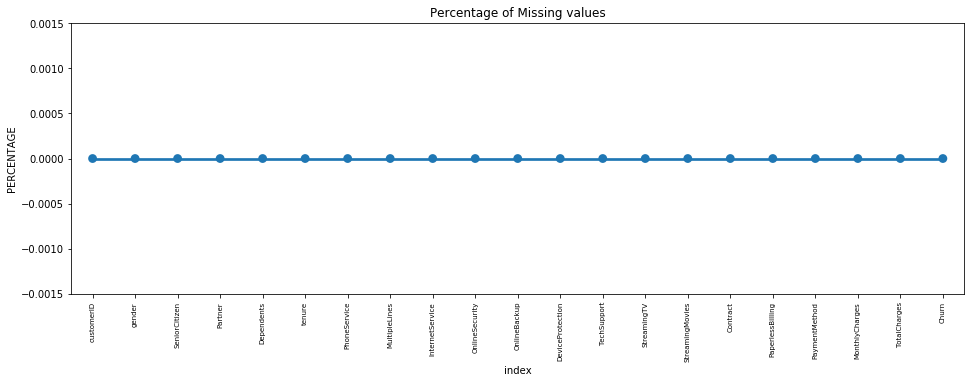

In [13]:
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()                                      #not necessory step

- Missing Data - Initial Intuition

     Here, we don't have any missing data.  ( as it considering NA a value thats why we need to convert it to numeric)

# Data Cleaning

### create copy of base data for manupulation and processing

In [14]:
telco_df = telco_data.copy()

### Total amount should be numeric value so converting it to numeric data type

In [15]:
telco_df.TotalCharges =pd.to_numeric(telco_df.TotalCharges, errors="coerce")
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- pandas.to_numeric() is one of the general functions in Pandas which is used to convert argument to a numeric type.
- errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

  If ‘raise’, then invalid parsing will raise an exception
  
   If ‘coerce’, then invalid parsing will be set as NaN
   
    If ‘ignore’, then invalid parsing will return the input

###   As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [16]:
telco_df.loc[telco_df["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Missing Value Treatement

  Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [17]:
# removing missing values 
telco_df.dropna(how='any',inplace=True)
#      or
telco_df.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


 #### ‘any’ : If any NA values are present, drop that row or column.
 
 When using drop only, it drops the columns/rows you define 
 
 When using dropna, it removes all entries with NaN values (or null in general)
 
 Pandas drop_duplicates() function is useful in removing duplicate rows from dataframe.



### Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

- Tenure-how long employees have been working

In [18]:
#Get the max tenure
print(telco_df["tenure"].max())

72


In [19]:
# Group the tenure in bins of 12 months
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

telco_df["tenure_group"]=pd.cut(telco_df.tenure,range(1,80,12),right="False",labels=labels)

- You can also change which side is close by the right parameter. If you want to close the left side then pass right=False

https://lifewithdata.com/2022/02/19/pandas-pd-cut-how-to-do-binning-in-python-pandas/#:~:text=If%20you%20want%20to%20close%20the%20left%20side,names%20in%20a%20list%20to%20the%20labels%20parameter.

In [20]:
telco_df["tenure_group"].value_counts()

1 - 12     1671
61 - 72    1331
13 - 24     994
49 - 60     842
25 - 36     818
37 - 48     763
Name: tenure_group, dtype: int64

### Remove columns not required for processing

In [21]:
#Drop custer id and tenure
telco_df.drop(columns=["customerID","tenure"], axis=1, inplace= True)

In [22]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

### 1. Plot distibution of individual predictors by churn

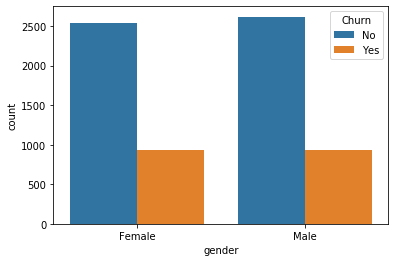

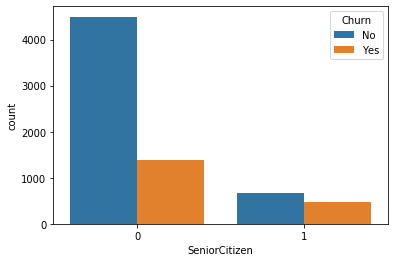

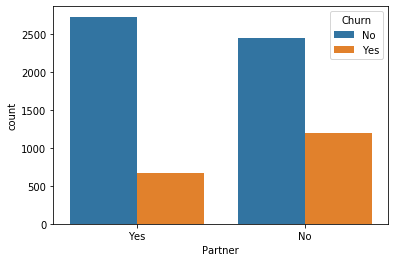

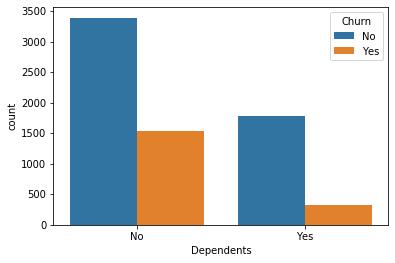

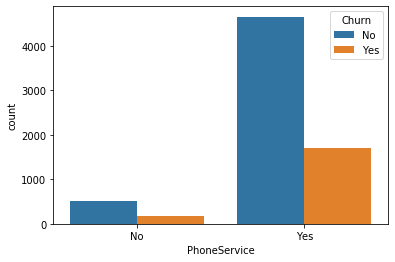

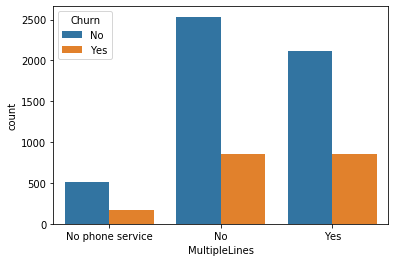

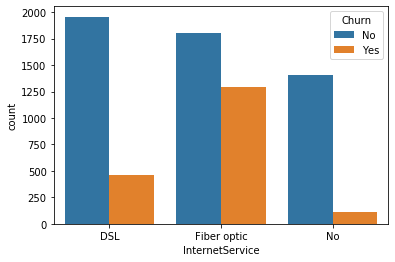

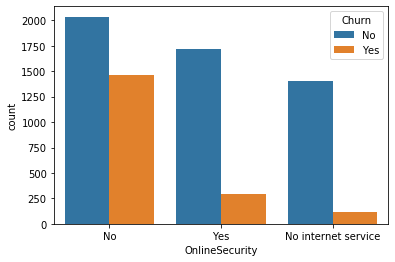

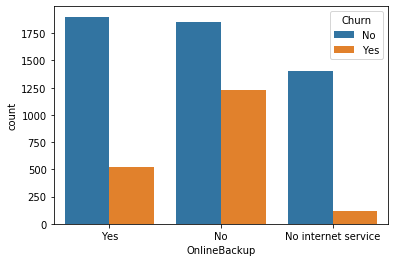

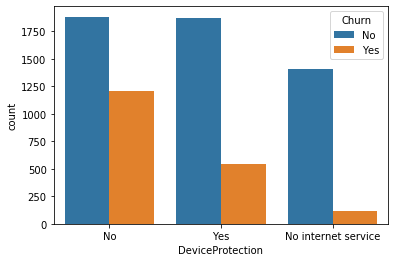

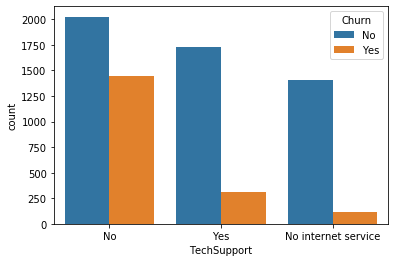

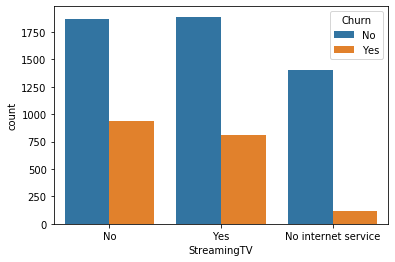

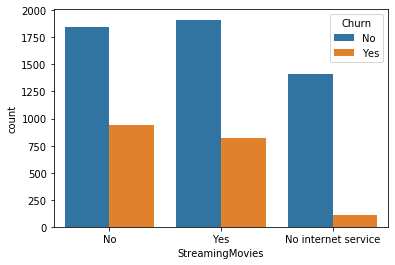

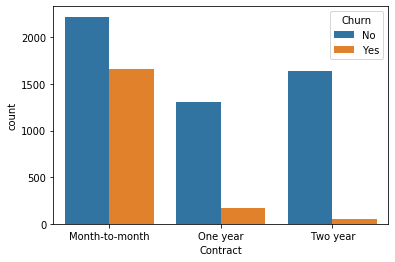

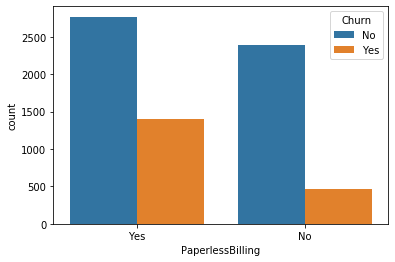

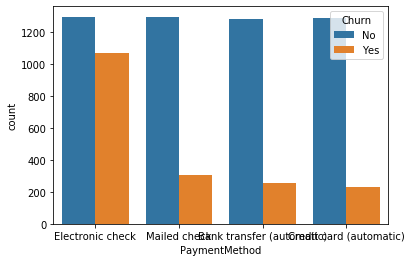

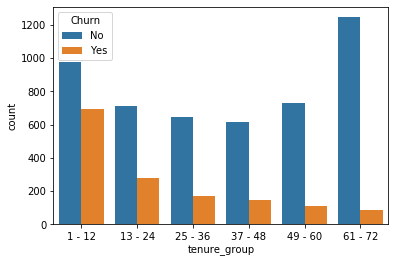

In [23]:
for i , predictor in enumerate(telco_df.drop(columns=["Churn","TotalCharges","MonthlyCharges"])):
    plt.figure(i)
    sns.countplot(data=telco_df,x=predictor,hue="Churn")

* it plot graph of churn with respect to each feature

When you use enumerate(), the function gives you back two loop variables:

The count of the current iteration

The value of the item at the current iteration

https://realpython.com/python-enumerate/

 ### 2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [24]:
telco_df["Churn"]= np.where(telco_df.Churn=="Yes",1,0)  # dont get it

In [25]:
# Convert String values (Yes and No) of Churn column to 1 and 0 #Taken from someone else code
telco_df.loc[telco_df.Churn=='No','Churn'] = 0 
telco_df.loc[telco_df.Churn=='Yes','Churn'] = 1
#convert to integer .
telco_df['Churn']=telco_df['Churn'].astype('int32')

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [26]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NaN
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [27]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NaN
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [28]:
telco_df["OnlineSecurity"].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [29]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [30]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NaN
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [31]:
telco_df["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

all churn values are 0 not possible some error is there

In [32]:
telco_df_dummies = pd.get_dummies(telco_df)           #why we create dummies
telco_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

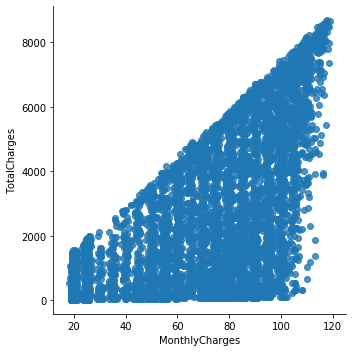

In [33]:
sns.lmplot(data=telco_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

### Churn by Monthly Charges and Total Charges

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions

Text(0.5, 1.0, 'Churn by Monthly Charges')

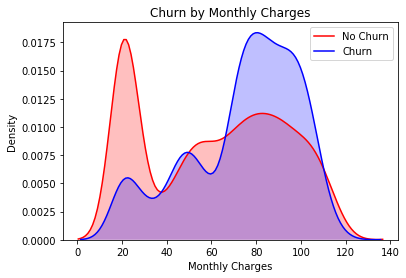

In [34]:
Monthly= sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_dummies["Churn"]==0)],color="Red",shade="True")
Monthly= sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_dummies["Churn"]==1)],ax= Monthly,color="Blue",shade="True")
Monthly.legend(["No Churn","Churn"],loc="upper right")
Monthly.set_ylabel("Density")
Monthly.set_xlabel("Monthly Charges")
Monthly.set_title("Churn by Monthly Charges")

  ***Insight:*** 
Churn is high when Monthly Charges ar high

# Markdown Guide
## Markdown Guide
### Markdown Guide
#### Markdown Guide
* highlight dotted point

 **BOLD**
 
 ***Italic Bold***
 
 *Italic*
 
 



 _ and * play the same role .


Text(0.5, 1.0, 'Churn by Total Charges')

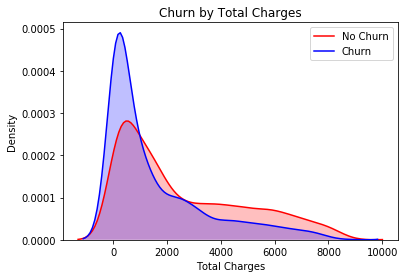

In [35]:
Total_Charges=sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_dummies["Churn"]==0)],color="red",shade=True)
Total_Charges=sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_dummies["Churn"]==1)],ax=Total_Charges,color="blue",shade=True)
Total_Charges.legend(["No Churn","Churn"],loc="upper right")
Total_Charges.set_ylabel("Density")
Total_Charges.set_xlabel("Total Charges")
Total_Charges.set_title("Churn by Total Charges")

 if u dont give "ax " parameter then also will get the same plot

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. 
Tenure, Monthly Charges & Total Charges then the picture is bit clear :- 
    Higher Monthly Charge at lower tenure results into lower Total Charge.
    Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

## Build a corelation of all predictors with 'Churn'

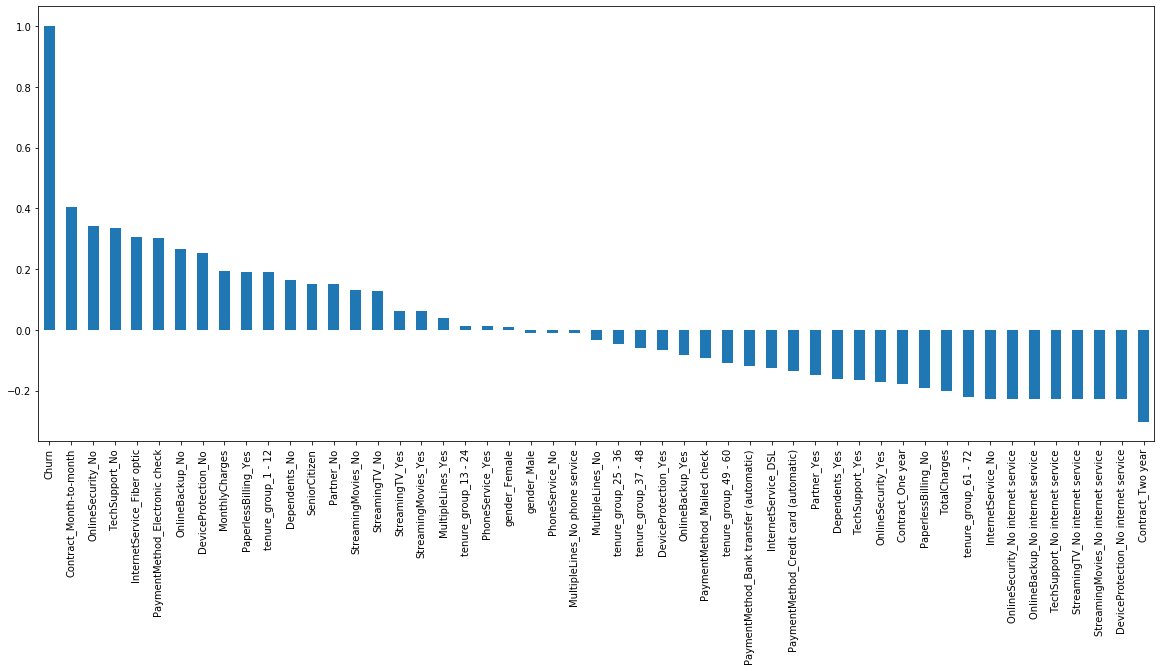

In [36]:
plt.figure(figsize=(20,8))
telco_df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

**Derived Insight:**

**HIGH Churn** seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

**LOW Churn** is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

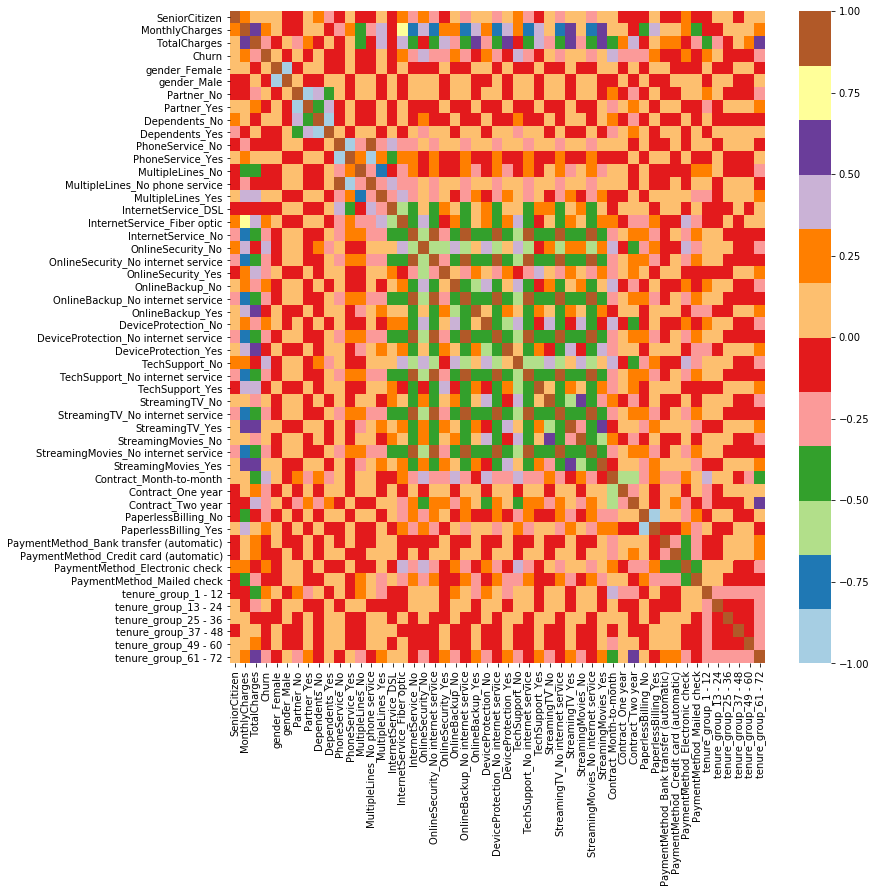

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_df_dummies.corr(),cmap="Paired")

# Bivariate Analysis

complex in satyjit code do  it your own ways

campusX take its help

also can move forward without performing it

### Saving this manipulated data as tel_churn to use it in model building part

In [38]:
telco_df_dummies.to_csv('tel_churn.csv')